# 4 - Sísmica de refração

Na aula anterior ([3. Refração crítica](3-refracao-critica.ipynb)), vimos o que acontece quando uma onda P incide sobre uma interface no ângulo crítico. A onda que refrata a 90° possui algumas características diferentes das ondas refletida e direta. A sísmica de refração é um método que utiliza essa características para estimar a profundidade da interface e as velocidades dos meios.

Utilizaremos as simulações de ondas da biblioteca [Fatiando a Terra](http://www.fatiando.org). Essas simulações utilizam o [método de diferenças finitas](http://en.wikipedia.org/wiki/Finite_difference_method) para calcular soluções da equação da onda.

## Objetivos

* Visualizar como seria um dado sísmico de refração (simulado).
* Observar os diversos caminhos que a onda faz para chegar nos receptores e como essas chegadas aparecem nos dados.
* Aprender como usar as medições de primeira chegada para calcular a profundidade da interface e as velocidades.

## Questão para entregar

<div class="alert alert-info" style="font-size:12pt; margin-top:20px">
<b>Explique como funciona a sísmica de refração.</b>
<p>
Sua resposta deve conter no mínimo:
</p>
<ul>
    <li>Como são dispostos os receptores e a fonte.</li>
    <li>Quais são as considerações que devem ser feitas para a escolha da disposição dos receptores.</li>
    <li>O que é medido e qual parte do dado nos interessa.</li>
    <li>Como utilizamos essas medições para extrair as informações do meio (sim, eu quero fórmulas).</li>
    <li>Quais são as limitações do método.</li>
</ul>
</div>

### Regras para a resposta

* Coloque **nome, data e o número da prática** em sua resposta. 
* A resposta pode ter no **máximo 1 página** (não uma folha).
* **Execute o notebook** antes de responder. As simulações abaixo foram feitas para te ajudar.
* **Pense e organize** sua resposta andtes de começar a escrever.

## Instruções

Esse documento é um [Jupyter notebook](http://jupyter.org/), um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](http://python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

**Para executar uma célula**, clique em cima dela e aperte `Shift + Enter`. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `Shift + Enter` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

## Setup

Rode as células abaixo para carregar os módulos necessários para essa prática.

In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
from fatiando.seismic import RickerWavelet, FDAcoustic2D

## Geração de dados sintéticos

Vamos utilizar as simulações de onda P para gerar dados sintéticos. Dessa vez também vamos ignorar as ondas S para não complicar a vida mais do que o necessário. 

O nosso modelo será uma interface plana separando a crosta do manto (a **Moho**).

In [23]:
40000/200

200.0

In [17]:
shape = (300, 1000)
spacing = 400
extent = [0, shape[1]*spacing, shape[0]*spacing, 0]
density = np.zeros(shape, dtype='float32') + 2700
velocity = np.zeros(shape, dtype='float32') + 6000
interface = 100
density[interface:,:] = 3200
velocity[interface:,:] = 8000

A fonte será uma explosão na superfície com as seguintes coordenadas:

In [34]:
fonte = (0, 100)
print('Coordenadas da fonte:')
print('  x = {} m'.format(fonte[1]*spacing))
print('  z = {} m'.format(fonte[0]*spacing))

Coordenadas da fonte:
  x = 40000 m
  z = 0 m


Agora vamos criar o nosso simulador de ondas P com uma fonte explosiva na superfície do nosso modelo.

In [44]:
simul = FDAcoustic2D(velocity, density, spacing=spacing, taper=0.003, padding=80)
simul.add_point_source(fonte, RickerWavelet(1, 4))

In [47]:
simul.run(500)

[##################################################] | 100% Completed | 20.4s


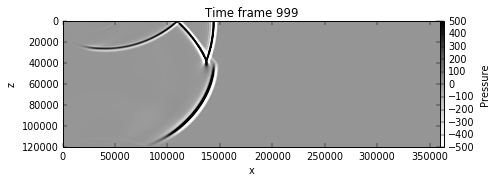

In [48]:
simul.explore(every=10, cutoff=500, cmap='Greys')

In [ ]:
simul.run(2000)

Rode a célula abaixo para gerar a animação.

In [ ]:
simul.animate(every=30, embed=True, dpi=60, cutoff=500, fps=6, cmap='Greys')

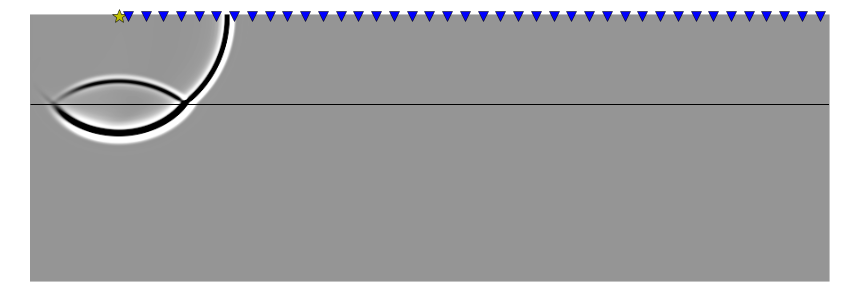

In [54]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(111)
ax.axison = False
ax.imshow(simul[500], cmap='Greys', vmin=-500, vmax=500)
ax.plot(100, 0, '*y', markersize=15)
recs = np.arange(110, shape[1], 20)
plt.plot(recs, np.zeros_like(recs), 'vb', markersize=10)
ax.hlines(100, 0, shape[1])
plt.xlim(0, shape[1])
plt.ylim(shape[0], -10)
plt.tight_layout(pad=0)

### Para pensar

*

## License and information

**Course website**: https://github.com/leouieda/geofisica2

**Note**: This notebook is part of the course "Geofísica 2" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)